### <center>Junior Colloquium</center>


# <center>Exploring Hurricane Activity and Climate Indices:</center>
# <center>Scatter Plots and Data Saving</center>


### <center>Gan Zhang</center> 
### <center>ganzhang@princeton.edu</center>

# <center>Scientific Question</center>

## - Climate controls of Atlantic hurricane activity? 


<img src="https://www.ncdc.noaa.gov/ibtracs/images/Fig_01_wmo_regions.png">

<center>IBTrACS / NOAA</center>




## <center>Working with Python</center>

<center><img src="./python.png"></center>

<center>XKCD</center>


# <center>Study Goals (I)</center>

### - An example of research workflow 

### - Deal with "messy" real-world data

### - Data-driven discovery


# <center>Study Goals (II)</center>

### - Scatter Plots
    - Linear Regression & Statistical Significance

### - Data storage
    - NetCDF example

In [1]:
import urllib.request 

#hurricane_data=urllib.request.urlopen("https://www.esrl.noaa.gov/psd/data/correlation/hurr.data")
hurricane_data=urllib.request.urlopen("https://raw.githubusercontent.com/GanZhang-GFD/princeton_tutorial/master/hurr.data")

for x in hurricane_data: 
    print(x)
 

b' 1948 2016\n'
b' 1948   0.00   0.00   0.00   0.00   0.00   0.00   0.00   5.50  10.00   4.50   0.75   0.00\n'
b' 1949   0.00   0.00   0.00   0.00   0.00   0.00   0.00   8.00   8.75   4.25   0.00   0.00\n'
b' 1950   0.00   0.00   0.00   0.00   0.00   0.00   0.00  16.00  24.25  12.75   0.00   0.00\n'
b' 1951   0.00   0.00   0.00   0.00   6.50   0.00   0.00   7.00  15.50   4.25   0.00   1.00\n'
b' 1952   0.00   0.00   0.00   0.00   0.00   0.00   0.00   1.75   8.75   5.00   0.00   0.00\n'
b' 1953   0.00   0.00   0.00   0.00   0.00   0.00   0.00   2.75  13.75   2.50   0.00   0.00\n'
b' 1954   0.00   0.00   0.00   0.00   0.00   1.00   0.00   4.00   5.75  14.75   0.00   0.50\n'
b' 1955   2.00   0.00   0.00   0.00   0.00   0.00   0.00  16.50  23.50   1.00   0.00   0.00\n'
b' 1956   0.00   0.00   0.00   0.00   0.00   0.00   0.50   8.50   1.50   0.00   2.50   0.00\n'
b' 1957   0.00   0.00   0.00   0.00   0.00   2.25   0.00   0.00  18.75   0.00   0.00   0.00\n'
b' 1958   0.00   0.00   0.00   0.0

In [2]:
import numpy as np

# prepare to convert the strings to numeric values 

yr_start = 1979
yr_end   = 2016

# create an array to store the data
hurr_data = np.zeros((yr_end-yr_start+1, 13))
icount = 0

hurricane_data=urllib.request.urlopen("https://www.esrl.noaa.gov/psd/data/correlation/hurr.data")

In [3]:
import re

for line in hurricane_data: 
    
    # What are the purposes of the two-line code above?
    linex = re.sub(' +', ' ', line.decode('utf-8'))
    hurr_data_temp0=np.asarray( linex.strip().split(" ") ) 
   
    print(hurr_data_temp0)    
    
    if len(hurr_data_temp0) == 13: 
        #print("\n possible data line... converting strings to numeric values \n")
        hurr_data_temp = hurr_data_temp0.astype(np.float)
    
        if hurr_data_temp[0] >= yr_start and hurr_data_temp[0] <= yr_end:
            print("\n data within desired year range \n")
            hurr_data[icount,:] = hurr_data_temp
            icount = icount+1


['1948' '2016']
['1948' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '5.50' '10.00'
 '4.50' '0.75' '0.00']
['1949' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '8.00' '8.75'
 '4.25' '0.00' '0.00']
['1950' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '16.00' '24.25'
 '12.75' '0.00' '0.00']
['1951' '0.00' '0.00' '0.00' '0.00' '6.50' '0.00' '0.00' '7.00' '15.50'
 '4.25' '0.00' '1.00']
['1952' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '1.75' '8.75'
 '5.00' '0.00' '0.00']
['1953' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '2.75' '13.75'
 '2.50' '0.00' '0.00']
['1954' '0.00' '0.00' '0.00' '0.00' '0.00' '1.00' '0.00' '4.00' '5.75'
 '14.75' '0.00' '0.50']
['1955' '2.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '16.50' '23.50'
 '1.00' '0.00' '0.00']
['1956' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.50' '8.50' '1.50'
 '0.00' '2.50' '0.00']
['1957' '0.00' '0.00' '0.00' '0.00' '0.00' '2.25' '0.00' '0.00' '18.75'
 '0.00' '0.00' '0.00']
['1958' '0.00' '0.00' '0.00' '0.00

[1997.5     0.03    0.      0.      0.      0.      0.11    0.97    5.68
   11.59    3.89    1.19]


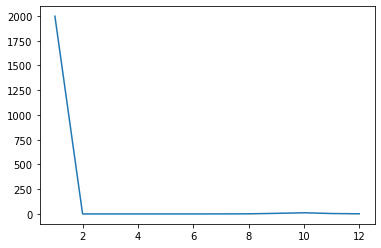

In [4]:
# Sanity check... What could go wrong? 

np.set_printoptions(precision=2, suppress=True)

# print out the multi-year means for each month (Jan-Dec) 
print(hurr_data[:,0:12].mean(axis=0) )

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.linspace(1, 12, 12), hurr_data[:,0:12].mean(axis=0))

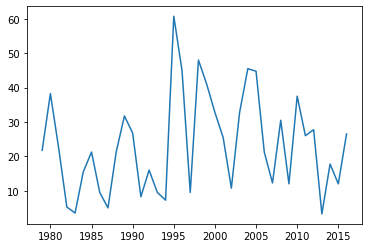

In [5]:
# looks like most hurricanes occur during the 7th to the 11th months
# Let's sum up values for each year
hurr_jason=hurr_data[:,7:12].sum(axis=1)
plt.plot(hurr_data[:,0], hurr_jason)

In [6]:
# Read some ENSO data
nina_data = np.zeros((yr_end-yr_start+1, 13))
icount = 0

# What could affect hurricane activity? let's get some ENSO data
enso_data=urllib.request.urlopen("https://www.esrl.noaa.gov/psd/data/correlation/nina34.data")

for line in enso_data: 
    linex = re.sub(' +', ' ', line.decode('utf-8'))
    nina_data_temp0=np.asarray( linex.strip().split(" ") ) 
    #print(nina_data_temp0)
    
    if len(nina_data_temp0) == 13: 
        #print("\n possible data line... converting strings to numeric values \n")
        nina_data_temp=nina_data_temp0.astype(np.float)
        #print(nina_data_temp)
    
        if nina_data_temp[0] >= yr_start and nina_data_temp[0] <= yr_end:
            #print("\n data within desired year range \n")
            nina_data[icount,:] = nina_data_temp
            icount = icount+1

nina_jason=nina_data[:,7:12].mean(axis=1)


Text(0.5, 1.0, 'Hurricane-ENSO Relation (Jul-Nov)')

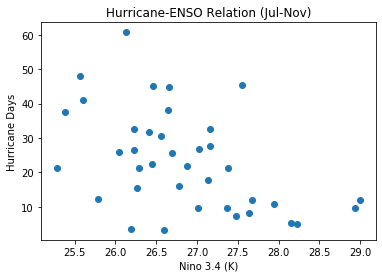

In [7]:
import matplotlib.pyplot as plt

plt.scatter(nina_jason, hurr_jason)
#plt.plot(nina_jason, hurr_jason, 'o', color='black');

plt.ylabel('Hurricane Days')
plt.xlabel('Nino 3.4 (K)')
plt.title("Hurricane-ENSO Relation (Jul-Nov)")


Text(0.5, 1.0, 'Hurricane-ENSO Relation (Jul-Nov)')

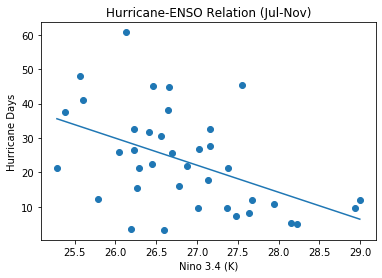

In [8]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

X = nina_jason;  Y = hurr_jason
plt.scatter(X,Y)

intercept, slope = polyfit(X, Y, 1)

X_plot = np.linspace(np.min(X),np.max(X),100)
plt.plot(X_plot, X_plot*slope + intercept)

plt.ylabel('Hurricane Days');  plt.xlabel('Nino 3.4 (K)')
plt.title("Hurricane-ENSO Relation (Jul-Nov)")

In [9]:
# What can the following lines do? 

#import statsmodels.api as smodel
#
#results = smodel.OLS(Y,smodel.add_constant(X)).fit()
#
#plt.scatter(X,Y)
#X_plot = np.linspace(np.min(X),np.max(X),100)
#plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
#
#plt.ylabel('Hurricane Days')
#plt.xlabel('Nino 3.4 (K)')
#plt.title("Hurricane-ENSO Relation (Jul-Nov)")

#plt.show()

#print(results.summary())

# <center>Let's check some additional climate indices</center>
# <center>https://www.esrl.noaa.gov/psd/data/climateindices/list/</center>


# <center>Anything else that might be associated with hurricane activity?</center>
### <center>Hint: Ocean strongly affects the atmosphere above...</center>

# <center>What are the underlying physical mechanism(s)?</center>

# <center>How can leverage the understanding to predict hurricane activity? </center>



#### <center> Murakami et al. (2018): Dominant effect of relative tropical Atlantic warming on major hurricane occurrence, Science.</center>

Text(0.5, 1.0, 'Hurricane-ENSO Relation (Jul-Nov)')

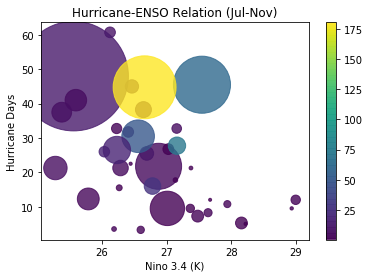

In [10]:
# Some data from wikipedia (!! Not Research-Quality !!)
# https://en.wikipedia.org/wiki/Atlantic_hurricane_season

death_num = [2118, 256, 10, 141,  22,  35,  241,  70,  10,  550,  112, 116,  66,  274,  1184,  141, 115,  179,  11,  12000,  465,  105,  187,  50,  93,  3260,  3960,  14,  478, 1065,  9,  392,  112,  302,  54,  21,  89,  748]
loss_billion = [4.3,  1,  0.045,  0.1,  2.6,  0.066,  4.5,  0.057,  0.090,  7,  10.7,  0.15,  2.5,  27,  0.271,  1.56,  9.3,  3.8,  0.11,  12.2,  5.9,  1.296,  11.45,  2.47,  6.33,  61.17,  180.7,  0.504,  3.42,  49.46,  0.058,  7.4,  17.4,  72.32,  1.51,  0.37,  0.81,  17.49] 

plt.scatter(X, Y, c=loss_billion, s=death_num, alpha=.8, cmap='viridis')
plt.colorbar()

plt.ylabel('Hurricane Days')
plt.xlabel('Nino 3.4 (K)')
plt.title("Hurricane-ENSO Relation (Jul-Nov)")

In [11]:
# put data in a csv/text file

np.savetxt("hurr.csv", hurr_jason, delimiter=",", fmt='%8.3f')
np.savetxt("nina34.csv", nina_jason, delimiter=",", fmt='%8.3f')

# put data into a netcdf file 

from netCDF4 import Dataset, num2date
rootgrp = Dataset("hurr_nina34.nc", "w", format="NETCDF4")
rootgrp.createDimension("year", yr_end-yr_start+1)

hurr=rootgrp.createVariable("hurr","f4",("year"))
hurr[:]=hurr_jason
nina34=rootgrp.createVariable("nina34","f4",("year"))
nina34[:]=nina_jason

rootgrp.close()